In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

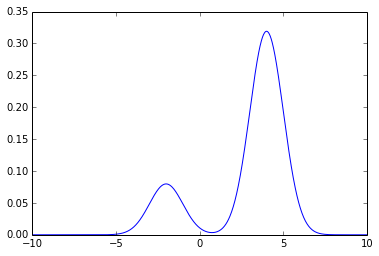

In [72]:
#### generate samples

def mypdf(x):
    return 0.2*st.norm.pdf(x,loc=-2,scale=1)+0.8*st.norm.pdf(x,loc=4,scale=1)

x = np.linspace(-10,10,1000)
y = np.array([mypdf(x[i]) for i in range(1000)])
plt.plot(x,y)
plt.show()

In [73]:
x0 = 0
N = 9000
T_list = [1-i*1.0/(N+100) for i in range(N)]
### use randomwalk
def prosposal_dist(x):
    return x + np.random.normal(0,0.2)

x = x0
x_list = []

In [74]:
#### main function
for i in range(N):
    u = np.random.uniform(0,1)
    candidate = prosposal_dist(x)
    judger = np.min([1.0,np.power(mypdf(candidate),1.0/T_list[i])*1.0/np.power(mypdf(x),1.0/T_list[i])])
    if u<judger:
        x = candidate
        x_list.append(x)



0.885


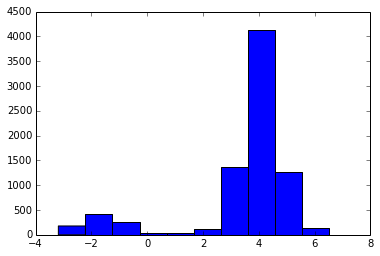

In [79]:
### result
print len(x_list)*1.0/N ###acceptance rate
plt.hist(x_list)
plt.show()